### Heat equation on bounded intervals
Our goal is to compute and visualize solutions of the heat equation
$$u_t = D u_{xx}, \quad 0<x<L$$
on the interval $[0,L]$ with Dirichlet boundary conditions $u(0,t)=0=u(L,t)$ or Neumann boundary conditions $u_x(0,t)=0=u_x(L,t)$ at the endpoints of the domain. First, we load the necessary Python modules.

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

Next, we define the following functions:
* `discrete_laplacian` provides a centered finite-difference approximation of the second derivative $u_{xx}$;
* `update_solution` uses the forward Euler method to update the solution to the next time step;
* `update_graph` animates the solution.

In [8]:
def discrete_laplacian(u, bdy):
    L = -2*u
    L += np.roll(u, -1)
    L += np.roll(u, +1)
    if bdy == 'Dirichlet':
        L[0]  = -2*u[0]+u[1]
        L[-1] = -2*u[-1]+u[-2]
    elif bdy == 'Neumann':
        L[0]  = 2*(-u[0]+u[1])
        L[-1] = 2*(-u[-1]+u[-2])
    return L

def update_solution(f, vDir, vNeu, d, Nframes, Nskip):
    n = 0
    uDir = np.copy(f)
    uNeu = np.copy(f)
    vDir[0, :] = uDir
    vNeu[0, :] = uNeu
    while n<Nframes:
        n += 1
        for k in range(Nskip):
            uDir += d*discrete_laplacian(uDir, 'Dirichlet')
            uNeu += d*discrete_laplacian(uNeu, 'Neumann')
        vDir[n, :] = uDir
        vNeu[n, :] = uNeu
        yield [uDir, uNeu]

def update_graph(U, x, line1, line2):
    line1.set_data(x, U[0][:])
    line2.set_data(x, U[1][:])

In the next cell, we define the diffusion constant $D>0$, set the initial condition, and run the animation of the solution.

<IPython.core.display.Javascript object>


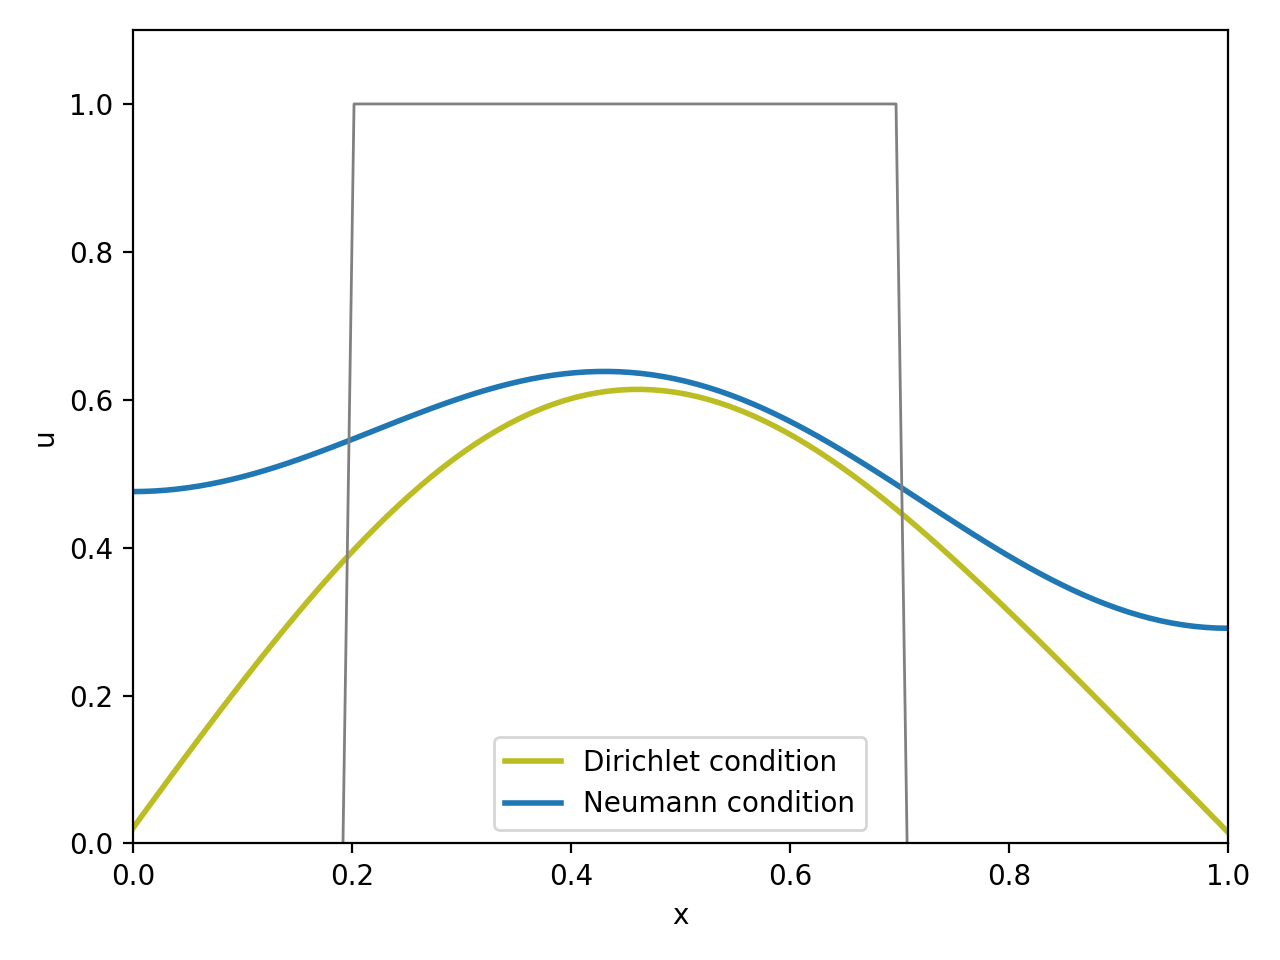

In [9]:
# model parameter
D = 0.001        # diffusion coefficient
L = 1            # domain length 

# numerical parameters
N = 100          # grid size

# set initial condition
x = np.linspace(0, L, N)
f = np.heaviside(x-0.2, 0) - np.heaviside(x-0.7, 0)

# animation parameters
Nsteps = 4000
Nskip = 5

# set time step to satisfy stability criterion (cfl = D*Δt/Δx^2 < 0.5)
cfl = 0.4
dx = L/(N-1)
dt = cfl / D * dx**2

# compute and animate solution
Nframes = int(Nsteps/Nskip)
vDir = np.zeros((Nframes, N))
vNeu = np.zeros((Nframes, N))

fig = plt.figure()
ax  = plt.axes(xlim=(0,1), ylim=(np.min(np.min(f)*1.1,0), np.max(np.max(f)*1.1,0)))
line1, = ax.plot([], [], linewidth=2, color = "tab:olive")
line2, = ax.plot([], [], linewidth=2, color = "tab:blue")
line3, = ax.plot(x, f, linewidth=1, color = "grey")
ax.set_xlabel('x')
ax.set_ylabel('u')
plt.legend((line1, line2), ('Dirichlet condition', 'Neumann condition'))
ani = animation.FuncAnimation(fig, update_graph,
                              update_solution(f, vDir, vNeu, cfl, Nframes, Nskip),
                              fargs=(x, line1, line2),
                              interval=25, blit=False, repeat=False)
plt.tight_layout()
plt.show()

Finally, we visualize the solutions in space-time contour plots.

<IPython.core.display.Javascript object>


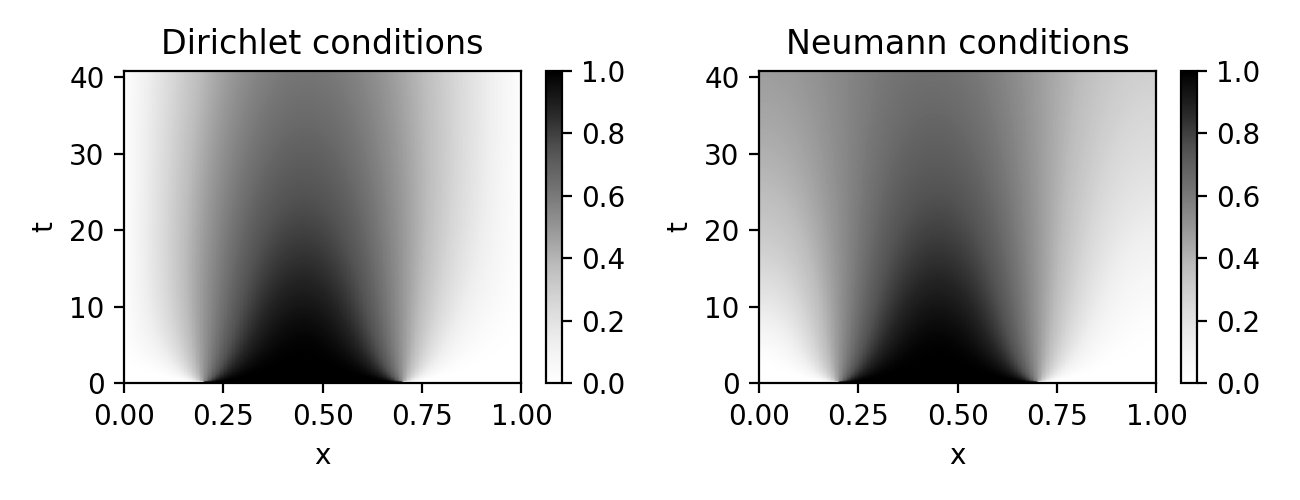

In [10]:
fig, ax = plt.subplots(1,2,figsize=(6.5,2.5))
extent = [0, L, 0, Nsteps*dt]
imu = ax[0].imshow(vDir, cmap='Greys', extent=extent, aspect='auto', origin='lower')
imv = ax[1].imshow(vNeu, cmap='Greys', extent=extent, aspect='auto', origin='lower')
ax[0].set_title('Dirichlet conditions')
ax[0].set_xlabel('x')
ax[0].set_ylabel('t')
ax[1].set_title('Neumann conditions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('t')
fig.colorbar(imu, ax=ax[0])
fig.colorbar(imv, ax=ax[1])
plt.tight_layout()
plt.show()